In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
import math

# modeling routines from Scikit Learn packages
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, auc
from math import sqrt  # for root mean-squared error calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('modeling_data1.csv') 

In [3]:
df.head()

,Unnamed: 0,X,EH_ID,Season,Age,pos_group,Team,GP,Take_GAR,Draw_GAR,...,Off_GAR_delta,EVD_GAR_delta,SPAR_delta,lag_Comp1,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7
0,1,1,AARON.DOWNEY,07-08,33.347023,F,DET,56,-2.4,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,AARON.PALUSHAJ,11-12,22.316222,F,MTL,38,0.0,1.4,...,NaN,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,AARON.VOLPATTI,12-13,27.592060,F,VAN/WSH,33,-0.2,-0.1,...,-1.4,-1.3,-1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,AARON.VOLPATTI,13-14,28.591376,F,WSH,41,-0.3,-0.3,...,NaN,NaN,NaN,-5.046155,0.680741,0.587205,-1.258004,0.506416,0.440692,-0.122173
4,5,5,AARON.VOROS,07-08,26.499658,F,MIN,55,-1.8,0.2,...,-2.2,-2.8,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'X', 'EH_ID', 'Season', 'Age', 'pos_group', 'Team', 'GP',
       'Take_GAR', 'Draw_GAR', 'SPAR', 'xSPAR', 'ev_zone_pct', 'EVO_GAR',
       'EV_RF', 'EV_QF', 'rapm_ev_gf60', 'rapm_ev_cf60', 'rapm_ev_xgf60',
       'EVD_GAR', 'EV_RA', 'EV_QA', 'rapm_ev_ca60', 'rapm_ev_xga60',
       'pp_zone_pct', 'PPO_GAR', 'PPO_RF', 'PPO_QF', 'rapm_pp_gf60',
       'rapm_pp_cf60', 'rapm_pp_xgf60', 'g_60', 'a1_60', 'a2_60', 'p_60',
       'isf_60', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7',
       'cluster', 'lead_EVO_GAR', 'lead_EVD_GAR', 'lead_PPO_GAR', 'lead_GP',
       'lead_rapm_ev_xgf60', 'lead_g_60', 'lead_p_60', 'lead_SHD_GAR',
       'team_change', 'Off_GAR', 'Def_GAR', 'GAR', 'WAR', 'lead_Off_GAR',
       'lead_Def_GAR', 'lead_GAR', 'lead_WAR', 'lag_Off_GAR', 'lag_Def_GAR',
       'lag_GAR', 'lag_WAR', 'lead_SPAR', 'lag_SPAR', 'EVO_GAR_delta',
       'WAR_delta', 'GAR_delta', 'Def_GAR_delta', 'Off_GAR_delta',
       'EVD_GAR_delta', 'SPAR_delta', 'lag_C

In [5]:
f=df[df['pos_group']=='F']

In [6]:
d=df[df['pos_group']=='D']

In [7]:
f.describe()

## mean WAR_delta -0.09; standard deviation is 1.1869
#75% value is 0.5 -> probably safely target a 1 WAR delta.

## GAR delta is 3.5 at 75%; probably target 2

#SPAR delta is at 1.2 at 75% but a 2.26 standard deviation; probably target 1 to 2. 

,Unnamed: 0,X,Age,GP,Take_GAR,Draw_GAR,SPAR,xSPAR,ev_zone_pct,EVO_GAR,...,Off_GAR_delta,EVD_GAR_delta,SPAR_delta,lag_Comp1,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7
count,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,...,4098.000000,4371.00000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,2606.000000,2606.000000,27.515623,65.682403,0.442218,0.064901,1.555728,1.175110,12.716962,3.156304,...,-0.372230,-0.00103,-0.179697,0.478552,0.025148,-0.037957,0.049214,-0.011990,0.000772,0.014666
std,1504.430457,1504.430457,4.491708,14.946760,1.052358,1.122635,2.204564,1.841407,2.692380,4.485625,...,5.458576,2.66017,2.261145,3.573617,2.043573,1.656241,1.338391,1.225260,1.101357,1.045574
min,1.000000,1.000000,18.332649,31.000000,-4.000000,-3.300000,-5.100000,-4.000000,1.910000,-8.600000,...,-18.800000,-10.80000,-8.800000,-7.864718,-8.792509,-6.369997,-5.879667,-5.573182,-4.892507,-4.241938
25%,1303.500000,1303.500000,24.098563,55.000000,-0.200000,-0.600000,0.000000,-0.100000,10.975000,-0.200000,...,-4.000000,-1.70000,-1.700000,-2.432593,-1.284672,-1.078939,-0.856098,-0.798842,-0.704436,-0.628872
50%,2606.000000,2606.000000,26.910335,70.000000,0.500000,-0.100000,1.200000,0.900000,12.610000,2.500000,...,-0.500000,0.00000,-0.200000,0.188977,0.060268,-0.051617,-0.009828,0.035201,-0.002300,0.004438
75%,3908.500000,3908.500000,30.525667,79.000000,1.100000,0.600000,2.800000,2.200000,14.350000,5.900000,...,3.000000,1.70000,1.200000,3.122522,1.430680,0.925379,0.935667,0.801657,0.682955,0.687581
max,5211.000000,5211.000000,44.878850,84.000000,4.100000,11.000000,14.100000,11.500000,23.680000,22.900000,...,22.600000,13.30000,9.600000,13.196131,6.925972,8.032255,4.910398,6.689503,5.348513,3.989412


In [8]:
d.describe()


#similar value for defensemen

,Unnamed: 0,X,Age,GP,Take_GAR,Draw_GAR,SPAR,xSPAR,ev_zone_pct,EVO_GAR,...,Off_GAR_delta,EVD_GAR_delta,SPAR_delta,lag_Comp1,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7
count,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,...,2137.000000,2304.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,6572.500000,6572.500000,27.869183,63.540044,0.456576,-0.004225,1.218148,0.725018,10.678979,1.465320,...,-0.297520,-0.106901,-0.186289,0.287545,0.068801,-0.001313,0.008044,0.023880,0.034068,0.015369
std,785.918041,785.918041,4.494543,15.424296,1.195863,0.729018,2.149453,1.647140,2.013314,4.004115,...,5.464171,3.204415,2.396016,3.027602,2.043641,1.725816,1.334784,1.283651,1.153521,1.118627
min,5212.000000,5212.000000,18.466804,31.000000,-4.700000,-2.200000,-5.400000,-4.300000,3.720000,-13.300000,...,-22.300000,-11.600000,-8.400000,-6.408317,-7.500286,-8.754594,-5.024326,-5.162512,-6.196179,-4.359349
25%,5892.250000,5892.250000,24.490760,50.000000,-0.300000,-0.500000,-0.300000,-0.400000,9.322500,-1.300000,...,-3.600000,-2.100000,-1.700000,-1.974908,-1.239804,-1.010661,-0.806290,-0.788769,-0.700997,-0.681199
50%,6572.500000,6572.500000,27.263518,67.000000,0.500000,-0.100000,1.000000,0.500000,10.530000,1.200000,...,-0.200000,-0.100000,-0.200000,-0.295123,0.154641,0.053114,0.006737,-0.001661,0.014302,0.019069
75%,7252.750000,7252.750000,30.863792,78.000000,1.200000,0.400000,2.500000,1.600000,11.870000,3.900000,...,3.200000,2.025000,1.400000,2.111723,1.416061,1.035570,0.910877,0.809747,0.751028,0.740871
max,7933.000000,7933.000000,45.932923,84.000000,4.400000,6.400000,9.400000,9.300000,20.140000,18.700000,...,22.200000,10.000000,8.900000,12.800010,6.571711,7.041882,5.186657,5.184190,3.812339,3.976434


In [9]:
f.sort_values(by='WAR_delta', ascending=False)

,Unnamed: 0,X,EH_ID,Season,Age,pos_group,Team,GP,Take_GAR,Draw_GAR,...,Off_GAR_delta,EVD_GAR_delta,SPAR_delta,lag_Comp1,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7
1571,1572,1572,DUSTIN.BYFUGLIEN,09-10,24.766598,F,CHI,82,-2.1,-0.7,...,19.4,5.0,9.6,-0.461346,0.802859,0.356084,0.669304,-2.486695,-1.750594,-1.288241
2009,2010,2010,JAMIE.BENN,16-17,27.457906,F,DAL,77,0.1,-0.5,...,11.7,9.8,9.0,8.347014,-1.608893,1.726617,-2.894994,1.795258,0.717634,-0.489067
4666,4667,4667,TEDDY.PURCELL,09-10,24.314853,F,L.A/T.B,60,1.2,-1.0,...,22.6,2.1,8.6,-0.936071,-0.245037,-1.370338,1.042231,-1.568119,0.475077,-0.987856
1933,1934,1934,JAKE.GUENTZEL,17-18,23.238877,F,PIT,82,-0.6,0.3,...,15.4,6.2,8.4,3.468648,-2.124528,-3.489322,-1.157056,1.325927,0.090463,-0.827558
2005,2006,2006,JAMIE.BENN,12-13,23.457906,F,DAL,41,0.0,0.1,...,18.4,0.4,7.6,3.997258,2.597878,-3.617259,1.121359,0.438734,-1.473250,-0.578867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,5185,5185,ZACK.KASSIAN,19-20,28.936345,F,EDM,59,0.1,-0.9,...,NaN,NaN,NaN,-1.560526,-3.451203,-1.327249,-0.409946,0.731469,1.811408,-0.608759
5194,5195,5195,ZACK.SMITH,19-20,31.739904,F,CHI,50,-1.3,-0.2,...,NaN,NaN,NaN,-3.237388,0.135312,0.539653,0.697607,-0.483629,-1.366774,0.745306
5198,5199,5199,ZACK.STORTINI,10-11,25.305955,F,EDM,32,-0.6,1.4,...,NaN,NaN,NaN,-3.771194,0.692855,0.631998,0.489332,2.115215,-0.650189,-0.537243
5205,5206,5206,ZEMGUS.GIRGENSONS,19-20,25.987680,F,BUF,69,1.2,-0.8,...,NaN,NaN,NaN,-3.441844,2.028214,0.117264,-0.339041,-0.052560,1.231517,0.433262


[Text(0.5, 1.0, 'WAR_delta by Position')]

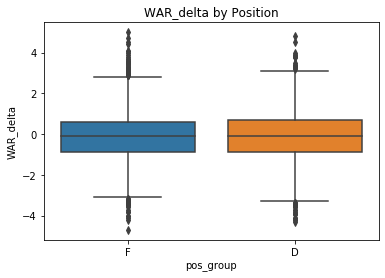

In [10]:
sns.boxplot(x="pos_group", y="WAR_delta", data=df).set(title = 'WAR_delta by Position')

More observed outliers for Forwards; otherwise similar distribution

[Text(0.5, 1.0, 'Comparison of WAR_delta density')]

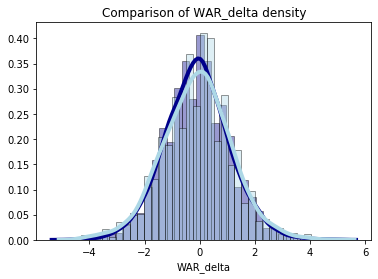

In [11]:
sns.distplot(f['WAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(d['WAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of WAR_delta density')

[Text(0.5, 1.0, 'GAR_delta by Position')]

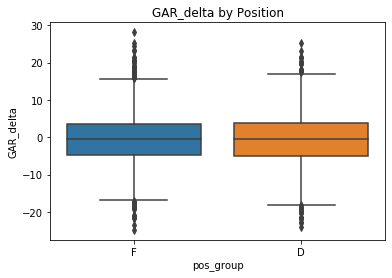

In [12]:
sns.boxplot(x="pos_group", y="GAR_delta", data=df).set(title = 'GAR_delta by Position')

[Text(0.5, 1.0, 'Comparison of GAR_delta density')]

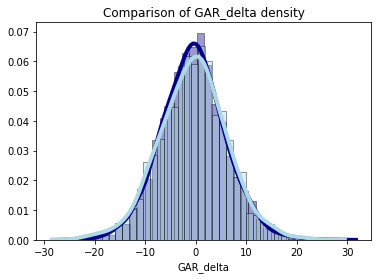

In [13]:
sns.distplot(f['GAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(d['GAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of GAR_delta density')

[Text(0.5, 1.0, 'SPAR_delta by Position')]

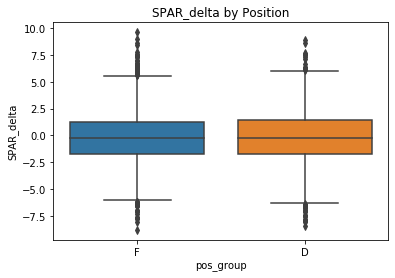

In [14]:
sns.boxplot(x="pos_group", y="SPAR_delta", data=df).set(title = 'SPAR_delta by Position')

[Text(0.5, 1.0, 'Comparison of SPAR_delta density')]

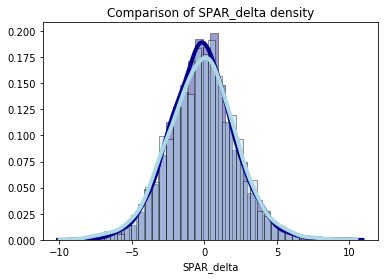

In [15]:
sns.distplot(f['SPAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(d['SPAR_delta'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of SPAR_delta density')

# Add Classifiers

Now that we have an understanding of 3rd quartile; let's model for probability beyond 3rd quartile "breakout"

In [16]:
f['SPAR_delta_breakout'] = np.where(f['SPAR_delta'] > 2, 1, 0)
d['SPAR_delta_breakout'] = np.where(d['SPAR_delta'] > 2, 1, 0)
f['WAR_delta_breakout'] = np.where(f['WAR_delta'] > 1,1,0)
d['WAR_delta_breakout'] = np.where(d['WAR_delta'] > 1,1,0)
f['GAR_delta_breakout'] = np.where(f['GAR_delta'] > 5,1,0)
d['GAR_delta_breakout'] = np.where(d['GAR_delta'] > 5,1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# Forwards SPAR_DELTA CLASSIFIER

In [17]:
f.columns

Index(['Unnamed: 0', 'X', 'EH_ID', 'Season', 'Age', 'pos_group', 'Team', 'GP',
       'Take_GAR', 'Draw_GAR', 'SPAR', 'xSPAR', 'ev_zone_pct', 'EVO_GAR',
       'EV_RF', 'EV_QF', 'rapm_ev_gf60', 'rapm_ev_cf60', 'rapm_ev_xgf60',
       'EVD_GAR', 'EV_RA', 'EV_QA', 'rapm_ev_ca60', 'rapm_ev_xga60',
       'pp_zone_pct', 'PPO_GAR', 'PPO_RF', 'PPO_QF', 'rapm_pp_gf60',
       'rapm_pp_cf60', 'rapm_pp_xgf60', 'g_60', 'a1_60', 'a2_60', 'p_60',
       'isf_60', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7',
       'cluster', 'lead_EVO_GAR', 'lead_EVD_GAR', 'lead_PPO_GAR', 'lead_GP',
       'lead_rapm_ev_xgf60', 'lead_g_60', 'lead_p_60', 'lead_SHD_GAR',
       'team_change', 'Off_GAR', 'Def_GAR', 'GAR', 'WAR', 'lead_Off_GAR',
       'lead_Def_GAR', 'lead_GAR', 'lead_WAR', 'lag_Off_GAR', 'lag_Def_GAR',
       'lag_GAR', 'lag_WAR', 'lead_SPAR', 'lag_SPAR', 'EVO_GAR_delta',
       'WAR_delta', 'GAR_delta', 'Def_GAR_delta', 'Off_GAR_delta',
       'EVD_GAR_delta', 'SPAR_delta', 'lag_C

In [18]:
f['team_change'] = f['team_change'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
f['lag_Comp1'] = f['lag_Comp1'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
f['lag_Comp2'] = f['lag_Comp2'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
f['lag_Comp3'] = f['lag_Comp3'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
f['lag_Comp4'] = f['lag_Comp4'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
f['lag_Comp5'] = f['lag_Comp5'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
f['lag_Comp6'] = f['lag_Comp6'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
f['lag_Comp7'] = f['lag_Comp7'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
#### only look at seasons before 2019-20; use 2019-20 to validate
seasons = ['07-08','08-09', '09-10', '10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19']
f1 = f[f.Season.isin(seasons)]


#years = [1952, 2007]
#gapminder.year.isin(years)

In [31]:
f_SPAR_model_data = np.array([f1.SPAR_delta_breakout,\
    f1.Comp1,\
    f1.Comp2,\
    f1.Comp3,\
    f1.Comp4,\
    f1.Comp5,\
    f1.Comp6,\
    f1.Comp7,\
    f1.lag_Comp1,\
    f1.lag_Comp2,\
    f1.lag_Comp3,\
    f1.lag_Comp4,\
    f1.lag_Comp5,\
    f1.lag_Comp6,\
    f1.lag_Comp7,\
    f1.team_change,\
    f1.Age]).T

In [32]:
X = f_SPAR_model_data[:,1:16] #changed to 1 until end, also changed from prelim_model to model
#X
y = f_SPAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [33]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.12448
Root Mean Square Error: 0.35282
Test Score: 0.87552
Train Score: 0.87412


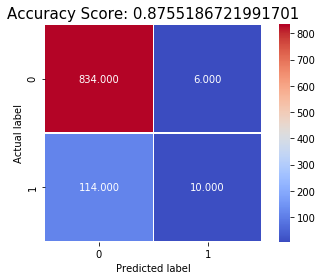

In [34]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.14315
Root Mean Square Error: 0.37836
Test Score: 0.85685
Train Score: 0.88554


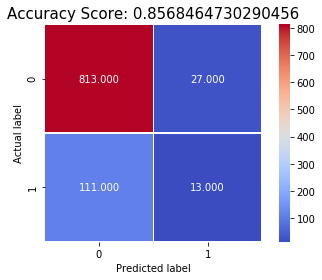

In [35]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.16701
Root Mean Square Error: 0.40867
Test Score: 0.83299
Train Score: 0.93797


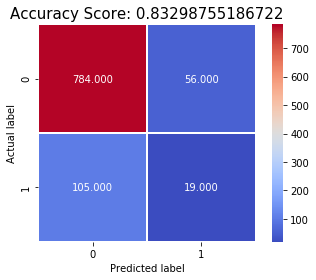

In [36]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.13071
Root Mean Square Error: 0.36153
Test Score: 0.86929
Train Score: 0.99948


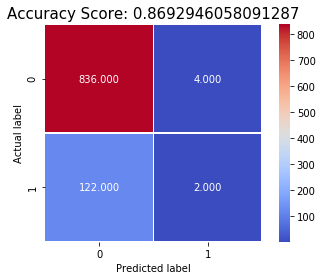

In [37]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.12967
Root Mean Square Error: 0.36009
Test Score: 0.87033
Train Score: 1.00000


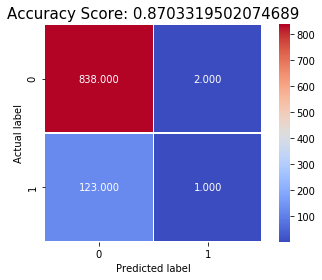

In [38]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.12967
Root Mean Square Error: 0.36009
Test Score: 0.87033
Train Score: 1.00000


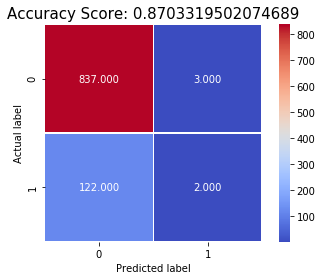

In [39]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.12552
Root Mean Square Error: 0.35429
Test Score: 0.87448
Train Score: 1.00000


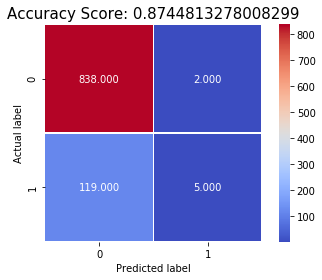

In [40]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.17946
Root Mean Square Error: 0.42363
Test Score: 0.82054
Train Score: 0.83000


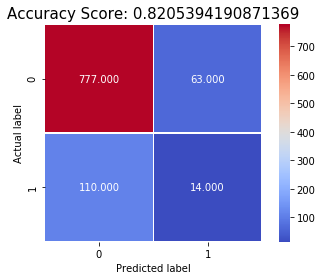

In [41]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.12552
Root Mean Square Error: 0.35429
Test Score: 0.87448
Train Score: 0.86893


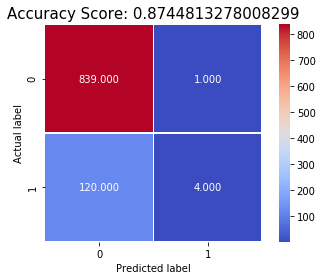

In [42]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.12656
Root Mean Square Error: 0.35575
Test Score: 0.87344
Train Score: 0.87075


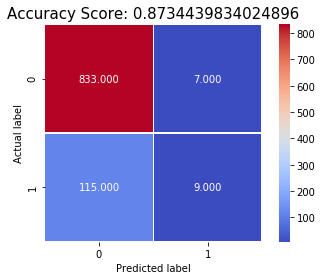

In [43]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [44]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score',  5: 'Intercept'}, inplace = True)
fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score
0,Decision Tree depth 3,0.12448,0.35282,0.87552,0.87412
0,Decision Tree depth 5,0.14315,0.37836,0.85685,0.88554
0,Decision Tree depth 10,0.16701,0.40867,0.83299,0.93797
0,Random Forest estimator 50,0.13071,0.36153,0.86929,0.99948
0,Random Forest estimator 100,0.12967,0.36009,0.87033,1
0,Random Forest estimator 250,0.12967,0.36009,0.87033,1
0,Random Forest estimator 500,0.12552,0.35429,0.87448,1
0,Stochastic Gradient Descent,0.17946,0.42363,0.82054,0.83
0,Elastic Net Classifier,0.12552,0.35429,0.87448,0.86893
0,Logistic Regression,0.12656,0.35575,0.87344,0.87075


In [45]:
logit_importance = logit.coef_[0]

In [46]:
logit_importance

array([-0.10014688, -0.22109999,  0.02696462,  0.01648096, -0.63429037,
        0.09759172,  0.11774475,  0.09705194,  0.05266042, -0.08494448,
       -0.04173214,  0.05855412,  0.03049662, -0.06152284, -0.00069519])

Feature: 0, Score: -0.10015
Feature: 1, Score: -0.22110
Feature: 2, Score: 0.02696
Feature: 3, Score: 0.01648
Feature: 4, Score: -0.63429
Feature: 5, Score: 0.09759
Feature: 6, Score: 0.11774
Feature: 7, Score: 0.09705
Feature: 8, Score: 0.05266
Feature: 9, Score: -0.08494
Feature: 10, Score: -0.04173
Feature: 11, Score: 0.05855
Feature: 12, Score: 0.03050
Feature: 13, Score: -0.06152
Feature: 14, Score: -0.00070


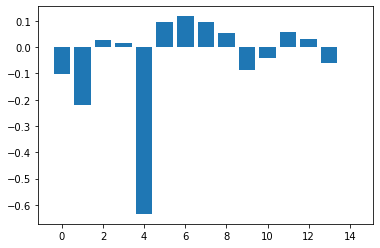

In [47]:
# summarize feature importance
for i,v in enumerate(logit_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(logit_importance))], logit_importance)
plt.show()

This shows that the higher shooting efficiency the more likely the player is to be conservative in their play in the following season; if anything those with higher passing ability in previous seasons tend to revert back to showing signs of being a play maker (2nd higher importance)

Feature: 0, Score: 0.07683
Feature: 1, Score: 0.17106
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.75211
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


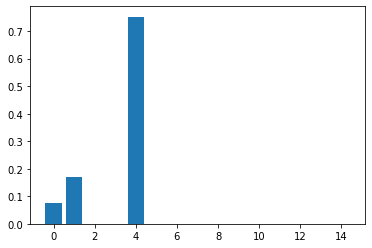

In [48]:
importance = dtree3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [49]:
def r2(dtree3, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

In [50]:
X1 = pd.DataFrame(X)

In [51]:
X1.columns =['Comp1','Comp2','Comp3','Comp4','Comp5',\
                            'Comp5','Comp6','Comp7','lag_Comp1','lag_Comp2','lag_Comp3',
                            'lag_Comp4','lag_Comp5','lag_Comp6','lag_Comp7']


In [52]:
feat_importances = pd.Series(dtree3.feature_importances_, index=X1.columns)


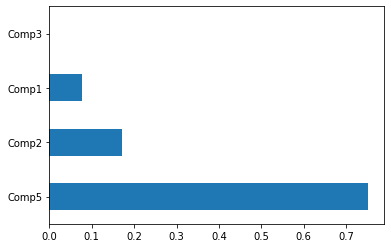

In [53]:
feat_importances.nlargest(4).plot(kind='barh')

Same trend for decision tree model; choose logistic regression model

In [54]:
seasons = ['18-19']
validate_f = f[f.Season.isin(seasons)]

In [55]:
f_SPAR_model_data_validate = np.array([validate_f.SPAR_delta_breakout,\
    validate_f.Comp1,\
    validate_f.Comp2,\
    validate_f.Comp3,\
    validate_f.Comp4,\
    validate_f.Comp5,\
    validate_f.Comp6,\
    validate_f.Comp7,\
    validate_f.lag_Comp1,\
    validate_f.lag_Comp2,\
    validate_f.lag_Comp3,\
    validate_f.lag_Comp4,\
    validate_f.lag_Comp5,\
    validate_f.lag_Comp6,\
    validate_f.lag_Comp7,\
    validate_f.team_change,\
    validate_f.Age]).T

In [56]:
X = f_SPAR_model_data_validate[:,1:16]

In [57]:
prob = logit.predict_proba(f_SPAR_model_data_validate[:,1:16])[:,1]
prob = pd.DataFrame(prob)


#logistic_model.predict_proba(data)[:,1]

In [58]:
prob.columns = ["Prob"]

In [59]:
prob

,Prob
0,0.047042
1,0.221707
2,0.035418
3,0.155328
4,0.103805
...,...
414,0.043418
415,0.029264
416,0.109223
417,0.097841


In [60]:
prelim_model_data = pd.concat([validate_f, prob], axis=1, join='inner')

In [61]:
prelim_model_data.columns

Index(['Unnamed: 0', 'X', 'EH_ID', 'Season', 'Age', 'pos_group', 'Team', 'GP',
       'Take_GAR', 'Draw_GAR', 'SPAR', 'xSPAR', 'ev_zone_pct', 'EVO_GAR',
       'EV_RF', 'EV_QF', 'rapm_ev_gf60', 'rapm_ev_cf60', 'rapm_ev_xgf60',
       'EVD_GAR', 'EV_RA', 'EV_QA', 'rapm_ev_ca60', 'rapm_ev_xga60',
       'pp_zone_pct', 'PPO_GAR', 'PPO_RF', 'PPO_QF', 'rapm_pp_gf60',
       'rapm_pp_cf60', 'rapm_pp_xgf60', 'g_60', 'a1_60', 'a2_60', 'p_60',
       'isf_60', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7',
       'cluster', 'lead_EVO_GAR', 'lead_EVD_GAR', 'lead_PPO_GAR', 'lead_GP',
       'lead_rapm_ev_xgf60', 'lead_g_60', 'lead_p_60', 'lead_SHD_GAR',
       'team_change', 'Off_GAR', 'Def_GAR', 'GAR', 'WAR', 'lead_Off_GAR',
       'lead_Def_GAR', 'lead_GAR', 'lead_WAR', 'lag_Off_GAR', 'lag_Def_GAR',
       'lag_GAR', 'lag_WAR', 'lead_SPAR', 'lag_SPAR', 'EVO_GAR_delta',
       'WAR_delta', 'GAR_delta', 'Def_GAR_delta', 'Off_GAR_delta',
       'EVD_GAR_delta', 'SPAR_delta', 'lag_C

In [62]:
prelim_model_data.shape

(40, 85)

In [63]:
prelim_model_data = prelim_model_data[['EH_ID', 'Season', 'Age','SPAR','lead_SPAR','SPAR_delta','lag_SPAR','Prob']]

[Text(0.5, 1.0, 'Comparison of Probability density')]

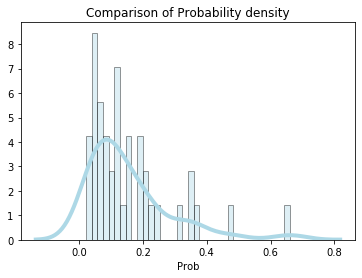

In [64]:
sns.distplot(prelim_model_data["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of Probability density')

In [65]:
prelim_model_data[prelim_model_data["Prob"] > 0.30]

,EH_ID,Season,Age,SPAR,lead_SPAR,SPAR_delta,lag_SPAR,Prob
16,ADAM.GAUDETTE,18-19,22.245038,-0.7,1.6,2.3,NaN,0.660187
52,ALEKSANDER.BARKOV,18-19,23.331964,8.4,0.8,-7.6,5.8,0.471003
89,ALEX.DEBRINCAT,18-19,21.037645,6.0,1.6,-4.4,5.6,0.341635
101,ALEX.GALCHENYUK,18-19,24.884326,-1.1,0.1,1.2,-1.7,0.348873
177,ALEX.WENNBERG,18-19,24.276523,-0.6,0.6,1.2,7.2,0.307753
220,ANDREI.SVECHNIKOV,18-19,18.767967,-0.8,4.9,5.7,NaN,0.365347


In [66]:
prelim_model_data[prelim_model_data["SPAR_delta"] > 2]

,EH_ID,Season,Age,SPAR,lead_SPAR,SPAR_delta,lag_SPAR,Prob
16,ADAM.GAUDETTE,18-19,22.245038,-0.7,1.6,2.3,NaN,0.660187
104,ALEX.IAFALLO,18-19,25.029432,0.5,2.8,2.3,2.4,0.051527
220,ANDREI.SVECHNIKOV,18-19,18.767967,-0.8,4.9,5.7,NaN,0.365347
295,ANTHONY.BEAUVILLIER,18-19,21.566051,1.8,3.9,2.1,1.6,0.151672
376,ARTEMI.PANARIN,18-19,27.173169,5.9,8.5,2.6,2.7,0.100561
393,AUSTON.MATTHEWS,18-19,21.289528,3.2,5.4,2.2,6.7,0.114121


In [67]:
f2_SPAR_model_data = np.array([f.SPAR_delta_breakout,\
    f.Comp1,\
    f.Comp2,\
    f.Comp3,\
    f.Comp4,\
    f.Comp5,\
    f.Comp6,\
    f.Comp7,\
    f.lag_Comp1,\
    f.lag_Comp2,\
    f.lag_Comp3,\
    f.lag_Comp4,\
    f.lag_Comp5,\
    f.lag_Comp6,\
    f.lag_Comp7,\
    f.team_change,\
    f.Age]).T

In [68]:
f["SPAR_delta_Prob"] = logit.predict_proba(f2_SPAR_model_data[:,1:16])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
seasons = ['19-20']

In [71]:
f_current_a = f[f.Season.isin(seasons)]

In [73]:
f_current_a = f[['EH_ID', 'Season', 'Age','SPAR','lag_SPAR','SPAR_delta_Prob']]

In [74]:
f_current_a = f_current_a[f_current_a["Season"] == '19-20']

In [75]:
f_current_a[f_current_a["SPAR_delta_Prob"] > 0.5].sort_values(by='SPAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,SPAR,lag_SPAR,SPAR_delta_Prob
2597,KAAPO.KAKKO,19-20,18.880219,-3.3,NaN,0.637081
2238,JESPERI.KOTKANIEMI,19-20,19.488022,-2.1,1.6,0.566609
2207,JEFF.SKINNER,19-20,27.627652,-0.1,6.4,0.540748


Adam Gaudette is the only forward to be predicted correctly of a breakout SPAR for 19-20 season. 
We can see the model missed out 5 players who had equally as giant of lifts; We suspect the young Jesperi Kotkaniemi 
to have a breakout season in the 20-21 season. Jeff Skinner reverted back in the current season and is likely to 
bounce back. 

# DEFENSEMEN SPAR_DELTA CLASSIFIER

In [76]:
d['team_change'] = d['team_change'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
d['lag_Comp1'] = d['lag_Comp1'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
d['lag_Comp2'] = d['lag_Comp2'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
d['lag_Comp3'] = d['lag_Comp3'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
d['lag_Comp4'] = d['lag_Comp4'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
#### only look at seasons before 2019-20; use 2019-20 to validate
seasons = ['07-08','08-09', '09-10', '10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19']
d1 = d[d.Season.isin(seasons)]

In [82]:
d_SPAR_model_data = np.array([d1.SPAR_delta_breakout,\
    d1.Comp1,\
    d1.Comp2,\
    d1.Comp3,\
    d1.Comp4,\
    d1.lag_Comp1,\
    d1.lag_Comp2,\
    d1.lag_Comp3,\
    d1.lag_Comp4,\
    d1.team_change,\
    d1.Age]).T

In [83]:
d_SPAR_model_data.shape

(2513, 11)

In [84]:
X = d_SPAR_model_data[:,1:10] #changed to 1 until end, also changed from prelim_model to model
#X
y = d_SPAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [85]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.13121
Root Mean Square Error: 0.36223
Test Score: 0.86879
Train Score: 0.86816


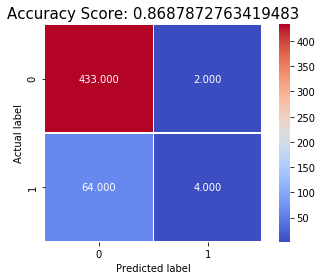

In [86]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.14314
Root Mean Square Error: 0.37834
Test Score: 0.85686
Train Score: 0.87562


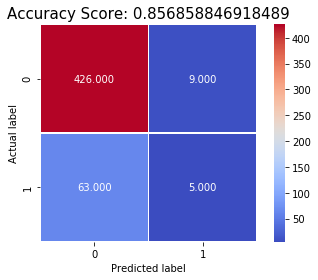

In [87]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.18290
Root Mean Square Error: 0.42767
Test Score: 0.81710
Train Score: 0.92587


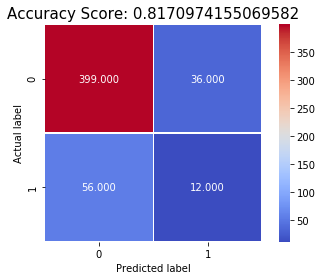

In [88]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.13121
Root Mean Square Error: 0.36223
Test Score: 0.86879
Train Score: 0.99801


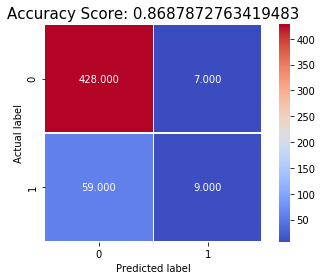

In [89]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.13718
Root Mean Square Error: 0.37037
Test Score: 0.86282
Train Score: 1.00000


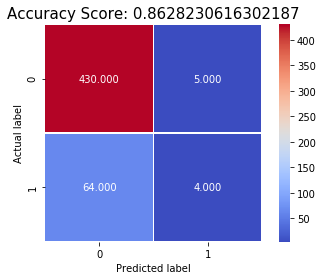

In [90]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.13917
Root Mean Square Error: 0.37305
Test Score: 0.86083
Train Score: 1.00000


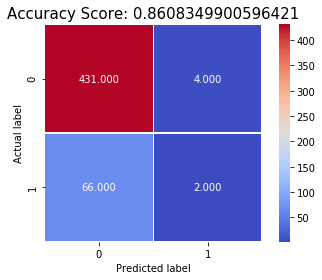

In [91]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.13519
Root Mean Square Error: 0.36768
Test Score: 0.86481
Train Score: 1.00000


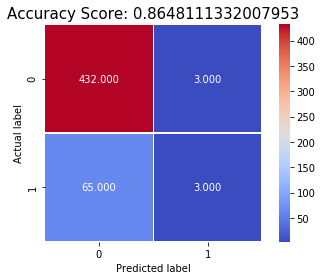

In [92]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.20477
Root Mean Square Error: 0.45252
Test Score: 0.79523
Train Score: 0.78706


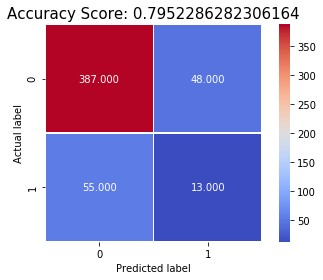

In [93]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.14314
Root Mean Square Error: 0.37834
Test Score: 0.85686
Train Score: 0.83930


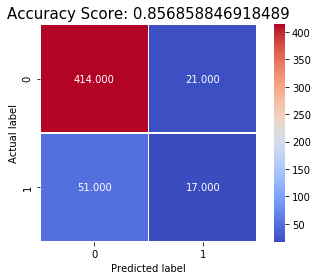

In [94]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.11928
Root Mean Square Error: 0.34538
Test Score: 0.88072
Train Score: 0.85821


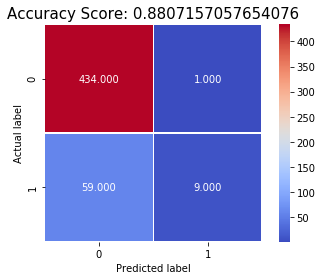

In [95]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [96]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score'}, inplace = True)
#fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score,5
0,Decision Tree depth 3,0.13121,0.36223,0.86879,0.86816,0
0,Decision Tree depth 5,0.14314,0.37834,0.85686,0.87562,0
0,Decision Tree depth 10,0.1829,0.42767,0.8171,0.92587,0
0,Random Forest estimator 50,0.13121,0.36223,0.86879,0.99801,0
0,Random Forest estimator 100,0.13718,0.37037,0.86282,1,0
0,Random Forest estimator 250,0.13917,0.37305,0.86083,1,0
0,Random Forest estimator 500,0.13519,0.36768,0.86481,1,0
0,Stochastic Gradient Descent,0.20477,0.45252,0.79523,0.78706,0
0,Elastic Net Classifier,0.14314,0.37834,0.85686,0.8393,0
0,Logistic Regression,0.11928,0.34538,0.88072,0.85821,0


In [97]:
logit_importance = logit.coef_[0]

In [98]:
logit_importance

array([-0.13248071, -0.23202719, -0.15869031, -0.51253214,  0.08012127,
        0.16651174,  0.02254421,  0.01950622,  0.01850424])

Feature: 0, Score: -0.13248
Feature: 1, Score: -0.23203
Feature: 2, Score: -0.15869
Feature: 3, Score: -0.51253
Feature: 4, Score: 0.08012
Feature: 5, Score: 0.16651
Feature: 6, Score: 0.02254
Feature: 7, Score: 0.01951
Feature: 8, Score: 0.01850


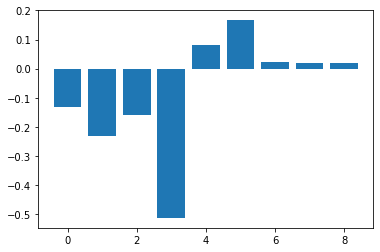

In [99]:
# summarize feature importance
for i,v in enumerate(logit_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(logit_importance))], logit_importance)
plt.show()

We can see that Scoring (feature 3) from the most recent paired with higher Defense (feature 5) leads to players being less likely for breakout. This is valuable to say that defenders switching to scoring won't be able to sustain it, which intuitively makes a lot of sense. 

In [100]:
seasons = ['18-19']
validate_d = d[d.Season.isin(seasons)]

In [101]:
validate_d

,Unnamed: 0,X,EH_ID,Season,Age,pos_group,Team,GP,Take_GAR,Draw_GAR,...,lag_Comp1,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7,SPAR_delta_breakout,WAR_delta_breakout,GAR_delta_breakout
5215,5216,5216,AARON.EKBLAD,18-19,22.899384,D,FLA,82,-0.5,0.7,...,1.958503,-4.202313,0.259834,-0.084135,0.721391,-1.049386,-0.245946,0,0,0
5240,5241,5241,ADAM.LARSSON,18-19,26.135524,D,EDM,82,-0.5,-0.1,...,-1.620265,-0.152049,0.886141,0.546176,-1.353889,0.185934,-0.098505,1,1,1
5249,5250,5250,ADAM.MCQUAID,18-19,32.221766,D,CBJ/NYR,50,-0.2,0.3,...,-3.556100,-1.657873,-1.428686,-1.616234,0.359693,-0.056252,0.112246,0,0,0
5257,5258,5258,ADAM.PELECH,18-19,24.377823,D,NYI,78,0.6,-0.7,...,-0.665836,2.162639,0.408814,0.939767,-0.640474,0.430141,0.643993,0,0,0
5272,5273,5273,ALEC.MARTINEZ,18-19,31.436003,D,L.A,60,2.0,-0.5,...,-0.442245,-2.130364,-2.026300,1.245203,1.154426,0.653365,0.574951,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7872,7873,7873,WILL.BUTCHER,18-19,23.986311,D,N.J,78,2.4,-1.2,...,6.040756,0.026662,0.683633,1.669762,0.514686,2.000761,0.599956,0,0,0
7891,7892,7892,YANNICK.WEBER,18-19,30.272416,D,NSH,62,0.2,-0.3,...,-2.943422,-0.265158,-1.136432,-0.716245,0.198459,0.399398,-0.261573,0,0,0
7903,7904,7904,ZACH.BOGOSIAN,18-19,28.465435,D,BUF,65,0.5,-0.9,...,-1.197254,-0.705943,1.070514,-0.238567,-1.929505,0.677939,-0.122314,0,0,0
7909,7910,7910,ZACH.WERENSKI,18-19,21.453799,D,CBJ,82,2.1,-0.4,...,2.851963,-0.877358,5.524557,-3.187602,1.518115,0.423446,0.340360,1,1,1


In [102]:
d_SPAR_model_data = np.array([validate_d.SPAR_delta_breakout,\
    validate_d.Comp1,\
    validate_d.Comp2,\
    validate_d.Comp3,\
    validate_d.Comp4,\
    validate_d.lag_Comp1,\
    validate_d.lag_Comp2,\
    validate_d.lag_Comp3,\
    validate_d.lag_Comp4,\
    validate_d.team_change,\
    validate_d.Age]).T

In [103]:
#probd = logit.predict_proba(d_SPAR_model_data_validate[:,1:10])[:,1]
#probd = pd.DataFrame(probd)

In [104]:
#probd.columns = ["Prob"]

In [105]:
#probd.sort_values(by='Prob', ascending=False)

In [107]:
#prelim_model_data_d = pd.concat([validate_d, probd],join="inner")

validate_d["Prob"] = logit.predict_proba(d_SPAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
validate_d

,Unnamed: 0,X,EH_ID,Season,Age,pos_group,Team,GP,Take_GAR,Draw_GAR,...,lag_Comp2,lag_Comp3,lag_Comp4,lag_Comp5,lag_Comp6,lag_Comp7,SPAR_delta_breakout,WAR_delta_breakout,GAR_delta_breakout,Prob
5215,5216,5216,AARON.EKBLAD,18-19,22.899384,D,FLA,82,-0.5,0.7,...,-4.202313,0.259834,-0.084135,0.721391,-1.049386,-0.245946,0,0,0,0.008436
5240,5241,5241,ADAM.LARSSON,18-19,26.135524,D,EDM,82,-0.5,-0.1,...,-0.152049,0.886141,0.546176,-1.353889,0.185934,-0.098505,1,1,1,0.377857
5249,5250,5250,ADAM.MCQUAID,18-19,32.221766,D,CBJ/NYR,50,-0.2,0.3,...,-1.657873,-1.428686,-1.616234,0.359693,-0.056252,0.112246,0,0,0,0.033905
5257,5258,5258,ADAM.PELECH,18-19,24.377823,D,NYI,78,0.6,-0.7,...,2.162639,0.408814,0.939767,-0.640474,0.430141,0.643993,0,0,0,0.080077
5272,5273,5273,ALEC.MARTINEZ,18-19,31.436003,D,L.A,60,2.0,-0.5,...,-2.130364,-2.026300,1.245203,1.154426,0.653365,0.574951,0,0,0,0.049008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7872,7873,7873,WILL.BUTCHER,18-19,23.986311,D,N.J,78,2.4,-1.2,...,0.026662,0.683633,1.669762,0.514686,2.000761,0.599956,0,0,0,0.071347
7891,7892,7892,YANNICK.WEBER,18-19,30.272416,D,NSH,62,0.2,-0.3,...,-0.265158,-1.136432,-0.716245,0.198459,0.399398,-0.261573,0,0,0,0.104590
7903,7904,7904,ZACH.BOGOSIAN,18-19,28.465435,D,BUF,65,0.5,-0.9,...,-0.705943,1.070514,-0.238567,-1.929505,0.677939,-0.122314,0,0,0,0.090403
7909,7910,7910,ZACH.WERENSKI,18-19,21.453799,D,CBJ,82,2.1,-0.4,...,-0.877358,5.524557,-3.187602,1.518115,0.423446,0.340360,1,1,1,0.318665


In [109]:
validate_d = validate_d[['EH_ID', 'Season', 'Age','SPAR','lead_SPAR','SPAR_delta','lag_SPAR','Prob']]

[Text(0.5, 1.0, 'Comparison of Probability density')]

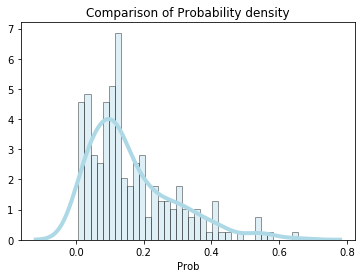

In [110]:
sns.distplot(validate_d["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of Probability density')

In [111]:
validate_d[validate_d["Prob"] > 0.3]

,EH_ID,Season,Age,SPAR,lead_SPAR,SPAR_delta,lag_SPAR,Prob
5240,ADAM.LARSSON,18-19,26.135524,-2.4,0.2,2.6,0.4,0.377857
5308,ALEX.PETROVIC,18-19,26.830938,-3.1,NaN,NaN,0.0,0.560921
5470,BEN.HUTTON,18-19,25.700205,-1.5,2.3,3.8,0.4,0.357034
5485,BRAD.HUNT,18-19,30.354552,-0.3,0.6,0.9,1.6,0.353219
5513,BRANDON.MONTOUR,18-19,24.725530,-2.3,-0.3,2.0,2.4,0.539673
5544,BRENDAN.SMITH,18-19,29.894593,-1.7,-2.5,-0.8,0.1,0.303841
5579,BRENT.SEABROOK,18-19,33.700205,-3.3,-0.7,2.6,-1.5,0.343302
5692,CAM.FOWLER,18-19,27.074606,-0.2,1.3,1.5,-0.9,0.332801
5925,DENNIS.CHOLOWSKI,18-19,20.876112,-1.0,-0.9,0.1,NaN,0.345720
5975,DERYK.ENGELLAND,18-19,36.747433,-3.1,0.8,3.9,1.5,0.424378


In [112]:
validate_d[validate_d["SPAR_delta"] > 2]

,EH_ID,Season,Age,SPAR,lead_SPAR,SPAR_delta,lag_SPAR,Prob
5240,ADAM.LARSSON,18-19,26.135524,-2.4,0.2,2.6,0.4,0.377857
5320,ALEX.PIETRANGELO,18-19,28.952772,3.4,6.2,2.8,3.7,0.088404
5422,ANTHONY.BITETTO,18-19,28.465435,-1.8,0.9,2.7,-0.8,0.224673
5470,BEN.HUTTON,18-19,25.700205,-1.5,2.3,3.8,0.4,0.357034
5579,BRENT.SEABROOK,18-19,33.700205,-3.3,-0.7,2.6,-1.5,0.343302
5975,DERYK.ENGELLAND,18-19,36.747433,-3.1,0.8,3.9,1.5,0.424378
6019,DOUGIE.HAMILTON,18-19,25.541410,1.6,4.5,2.9,3.2,0.201678
6229,IAN.COLE,18-19,29.859001,-2.1,3.1,5.2,1.8,0.288617
6238,ILYA.LYUBUSHKIN,18-19,24.739220,-0.2,2.0,2.2,NaN,0.130218
6242,IVAN.PROVOROV,18-19,21.965777,0.5,3.7,3.2,3.8,0.246301


In [113]:
d2_SPAR_model_data = np.array([d.SPAR_delta_breakout,\
    d.Comp1,\
    d.Comp2,\
    d.Comp3,\
    d.Comp4,\
    d.lag_Comp1,\
    d.lag_Comp2,\
    d.lag_Comp3,\
    d.lag_Comp4,\
    d.team_change,\
    d.Age]).T

In [114]:
d["SPAR_delta_Prob"] = logit.predict_proba(d2_SPAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
seasons = ['19-20']

In [116]:
d_current_a = d[d.Season.isin(seasons)]

In [117]:
d_current_a = d[['EH_ID', 'Season', 'Age','SPAR','lag_SPAR','SPAR_delta_Prob']]

In [118]:
d_current_a = d_current_a[d_current_a["Season"] == '19-20']

In [119]:
d_current_a[d_current_a["SPAR_delta_Prob"] > 0.5].sort_values(by='SPAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,SPAR,lag_SPAR,SPAR_delta_Prob
7628,SHAYNE.GOSTISBEHERE,19-20,26.699521,-1.0,1.0,0.600130
7329,P.K..SUBBAN,19-20,30.636550,-3.5,-0.2,0.589212
5890,DANTE.FABBRO,19-20,21.533196,-0.1,NaN,0.533892


# FORWARDS WAR DELTA

In [120]:
f['lag_WAR'] = f['lag_WAR'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
f_WAR_model_data = np.array([f1.WAR_delta_breakout,\
    f1.Comp1,\
    f1.Comp2,\
    f1.Comp3,\
    f1.Comp4,\
    f1.Comp5,\
    f1.Comp6,\
    f1.Comp7,\
    f1.lag_Comp1,\
    f1.lag_Comp2,\
    f1.lag_Comp3,\
    f1.lag_Comp4,\
    f1.lag_Comp5,\
    f1.lag_Comp6,\
    f1.lag_Comp7,\
    f1.team_change,\
    f1.Age]).T

In [122]:
X = f_WAR_model_data[:,1:16] #changed to 1 until end, also changed from prelim_model to model
#X
y = f_WAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [123]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.12863
Root Mean Square Error: 0.35865
Test Score: 0.87137
Train Score: 0.87153


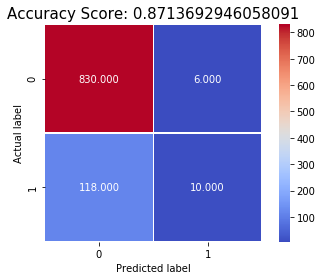

In [124]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.13900
Root Mean Square Error: 0.37283
Test Score: 0.86100
Train Score: 0.88373


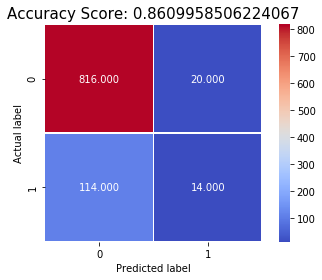

In [125]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.18050
Root Mean Square Error: 0.42485
Test Score: 0.81950
Train Score: 0.93563


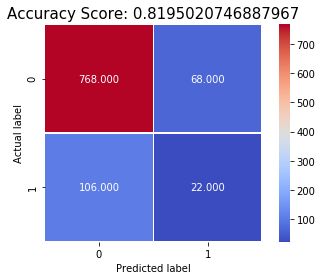

In [126]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.13278
Root Mean Square Error: 0.36439
Test Score: 0.86722
Train Score: 0.99974


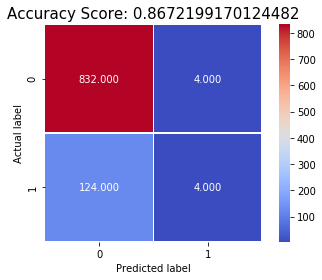

In [127]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.13174
Root Mean Square Error: 0.36296
Test Score: 0.86826
Train Score: 1.00000


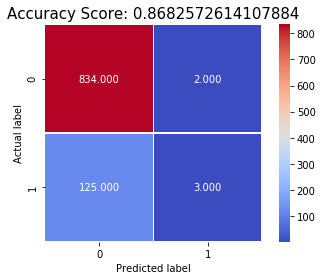

In [128]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.13278
Root Mean Square Error: 0.36439
Test Score: 0.86722
Train Score: 1.00000


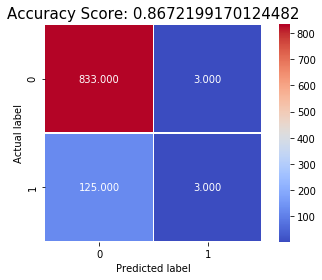

In [129]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.13278
Root Mean Square Error: 0.36439
Test Score: 0.86722
Train Score: 1.00000


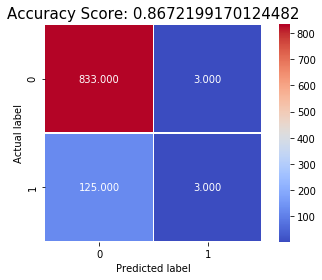

In [130]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.14315
Root Mean Square Error: 0.37836
Test Score: 0.85685
Train Score: 0.85829


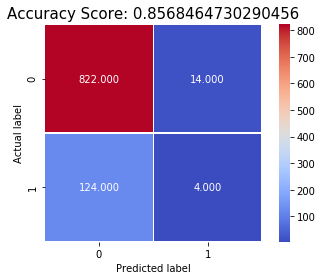

In [131]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.13071
Root Mean Square Error: 0.36153
Test Score: 0.86929
Train Score: 0.86582


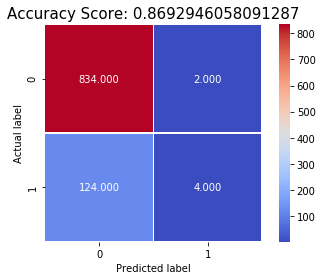

In [132]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.13174
Root Mean Square Error: 0.36296
Test Score: 0.86826
Train Score: 0.86841


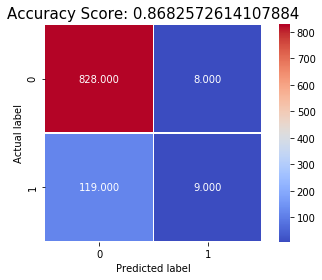

In [133]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [134]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score'}, inplace = True)
#fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score,5
0,Decision Tree depth 3,0.12863,0.35865,0.87137,0.87153,0
0,Decision Tree depth 5,0.139,0.37283,0.861,0.88373,0
0,Decision Tree depth 10,0.1805,0.42485,0.8195,0.93563,0
0,Random Forest estimator 50,0.13278,0.36439,0.86722,0.99974,0
0,Random Forest estimator 100,0.13174,0.36296,0.86826,1,0
0,Random Forest estimator 250,0.13278,0.36439,0.86722,1,0
0,Random Forest estimator 500,0.13278,0.36439,0.86722,1,0
0,Stochastic Gradient Descent,0.14315,0.37836,0.85685,0.85829,0
0,Elastic Net Classifier,0.13071,0.36153,0.86929,0.86582,0
0,Logistic Regression,0.13174,0.36296,0.86826,0.86841,0


In [135]:
logit_importance = logit.coef_[0]

In [136]:
logit_importance

array([-0.10056319, -0.21405309,  0.0387042 ,  0.02714022, -0.63222846,
        0.09852468,  0.12181756,  0.09043015,  0.04489663, -0.08820514,
       -0.05140386,  0.05466306,  0.02742742, -0.06291691,  0.03175752])

Feature: 0, Score: -0.10056
Feature: 1, Score: -0.21405
Feature: 2, Score: 0.03870
Feature: 3, Score: 0.02714
Feature: 4, Score: -0.63223
Feature: 5, Score: 0.09852
Feature: 6, Score: 0.12182
Feature: 7, Score: 0.09043
Feature: 8, Score: 0.04490
Feature: 9, Score: -0.08821
Feature: 10, Score: -0.05140
Feature: 11, Score: 0.05466
Feature: 12, Score: 0.02743
Feature: 13, Score: -0.06292
Feature: 14, Score: 0.03176


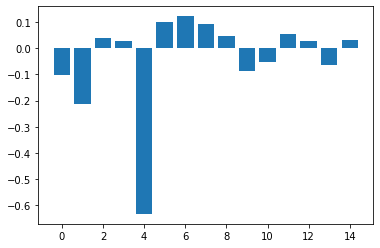

In [137]:
# summarize feature importance
for i,v in enumerate(logit_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(logit_importance))], logit_importance)
plt.show()

In [138]:
seasons = ['18-19']
validate_f1 = f[f.Season.isin(seasons)]

In [139]:
f1_WAR_model_data = np.array([validate_f1.WAR_delta_breakout,\
    validate_f1.Comp1,\
    validate_f1.Comp2,\
    validate_f1.Comp3,\
    validate_f1.Comp4,\
    validate_f1.Comp5,\
    validate_f1.Comp6,\
    validate_f1.Comp7,\
    validate_f1.lag_Comp1,\
    validate_f1.lag_Comp2,\
    validate_f1.lag_Comp3,\
    validate_f1.lag_Comp4,\
    validate_f1.lag_Comp5,\
    validate_f1.lag_Comp6,\
    validate_f1.lag_Comp7,\
    validate_f1.team_change,\
    validate_f1.Age]).T

In [140]:
validate_f1["Prob"] = logit.predict_proba(f1_WAR_model_data[:,1:16])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
validate_f1 = validate_f1[['EH_ID', 'Season','Age','WAR','lead_WAR','WAR_delta','lag_WAR','Prob']]

[Text(0.5, 1.0, 'Comparison of Probability density')]

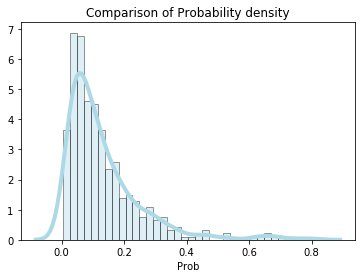

In [142]:
sns.distplot(validate_f1["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of Probability density')

In [143]:
validate_f1[validate_f1["Prob"] > 0.3]

,EH_ID,Season,Age,WAR,lead_WAR,WAR_delta,lag_WAR,Prob
104,ALEX.IAFALLO,18-19,25.029432,0.2,1.4,1.2,1.3,0.300165
133,ALEX.OVECHKIN,18-19,33.289528,1.5,0.6,-0.9,1.6,0.366815
177,ALEX.WENNBERG,18-19,24.276523,-0.3,0.3,0.6,3.7,0.651126
371,ARTEM.ANISIMOV,18-19,30.606434,-1.1,-0.6,0.5,-0.7,0.386701
604,BRANDON.SAAD,18-19,26.179329,0.1,0.2,0.1,0.9,0.463732
646,BRENDAN.GALLAGHER,18-19,26.655715,1.6,2.1,0.5,2.3,0.330688
681,BRETT.HOWDEN,18-19,20.761123,-1.1,-0.5,0.6,0.0,0.377621
688,BRETT.RITCHIE,18-19,25.503080,-1.7,NaN,NaN,0.3,0.333338
863,CHARLES.HUDON,18-19,24.525667,-0.8,NaN,NaN,1.5,0.332458
1005,CLAUDE.GIROUX,18-19,30.970568,3.4,1.6,-1.8,5.2,0.330691


In [144]:
validate_f1[validate_f1["WAR_delta"] > 1]

,EH_ID,Season,Age,WAR,lead_WAR,WAR_delta,lag_WAR,Prob
16,ADAM.GAUDETTE,18-19,22.245038,-0.3,0.8,1.1,0.0,0.224170
104,ALEX.IAFALLO,18-19,25.029432,0.2,1.4,1.2,1.3,0.300165
220,ANDREI.SVECHNIKOV,18-19,18.767967,-0.4,2.5,2.9,0.0,0.267462
295,ANTHONY.BEAUVILLIER,18-19,21.566051,1.0,2.1,1.1,0.8,0.131897
376,ARTEMI.PANARIN,18-19,27.173169,3.1,4.4,1.3,1.4,0.059666
393,AUSTON.MATTHEWS,18-19,21.289528,1.7,2.8,1.1,3.5,0.178467
744,BROCK.NELSON,18-19,27.214237,0.7,2.1,1.4,0.2,0.055141
774,BRYAN.RUST,18-19,26.642026,0.5,2.8,2.3,1.8,0.174719
860,CHANDLER.STEPHENSON,18-19,24.695414,-1.3,2.2,3.5,0.9,0.223768
1474,DERICK.BRASSARD,18-19,31.277207,-2.7,0.7,3.4,1.3,0.803899


In [146]:
f2_WAR_model_data = np.array([f.WAR_delta_breakout,\
    f.Comp1,\
    f.Comp2,\
    f.Comp3,\
    f.Comp4,\
    f.Comp5,\
    f.Comp6,\
    f.Comp7,\
    f.lag_Comp1,\
    f.lag_Comp2,\
    f.lag_Comp3,\
    f.lag_Comp4,\
    f.lag_Comp5,\
    f.lag_Comp6,\
    f.lag_Comp7,\
    f.team_change,\
    f.Age]).T

In [147]:
f["WAR_delta_Prob"] = logit.predict_proba(f2_WAR_model_data[:,1:16])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
seasons = ['19-20']

In [149]:
f_current_b = f[f.Season.isin(seasons)]

In [150]:
f_current_b = f[['EH_ID', 'Season', 'Age','WAR','lag_WAR','WAR_delta_Prob']]

In [151]:
f_current_b = f_current_b[f_current_b["Season"] == '19-20']

In [153]:
f_current_b[f_current_b["WAR_delta_Prob"] > 0.4].sort_values(by='WAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,WAR,lag_WAR,WAR_delta_Prob
2597,KAAPO.KAKKO,19-20,18.880219,-1.7,0.0,0.642620
2238,JESPERI.KOTKANIEMI,19-20,19.488022,-1.1,0.9,0.556305
2207,JEFF.SKINNER,19-20,27.627652,-0.1,3.4,0.535652
499,BOONE.JENNER,19-20,26.546201,-0.2,0.7,0.504628
2698,KYLE.CONNOR,19-20,23.060917,0.0,2.0,0.485389
2625,KEVIN.LABANC,19-20,24.054757,-0.4,0.4,0.465873
1519,DOMINIK.SIMON,19-20,25.399042,-0.8,2.1,0.437407
4243,RYAN.JOHANSEN,19-20,27.419576,-0.4,0.0,0.422719
4727,TIMO.MEIER,19-20,23.230664,0.6,2.6,0.418261
2426,JOHNNY.GAUDREAU,19-20,26.384668,0.5,3.2,0.406009


# DEFENSEMEN WAR DELTA

In [154]:
seasons = ['07-08','08-09', '09-10', '10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19']
d2 = d[d.Season.isin(seasons)]

In [155]:
d_WAR_model_data = np.array([d2.WAR_delta_breakout,\
    d2.Comp1,\
    d2.Comp2,\
    d2.Comp3,\
    d2.Comp4,\
    d2.lag_Comp1,\
    d2.lag_Comp2,\
    d2.lag_Comp3,\
    d2.lag_Comp4,\
    d2.team_change,\
    d2.Age]).T

In [156]:
X = d_WAR_model_data[:,1:10] #changed to 1 until end, also changed from prelim_model to model
#X
y = d_WAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [157]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.13320
Root Mean Square Error: 0.36497
Test Score: 0.86680
Train Score: 0.86219


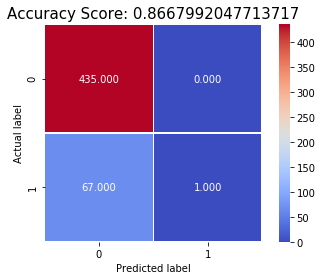

In [158]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.14911
Root Mean Square Error: 0.38614
Test Score: 0.85089
Train Score: 0.87363


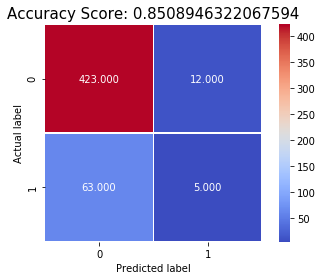

In [159]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.18290
Root Mean Square Error: 0.42767
Test Score: 0.81710
Train Score: 0.92090


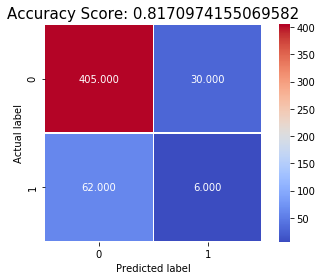

In [160]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.13320
Root Mean Square Error: 0.36497
Test Score: 0.86680
Train Score: 0.99950


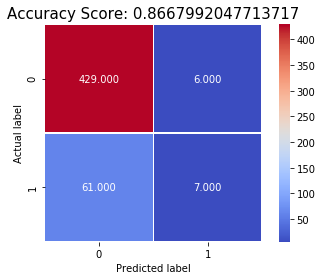

In [161]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.13121
Root Mean Square Error: 0.36223
Test Score: 0.86879
Train Score: 1.00000


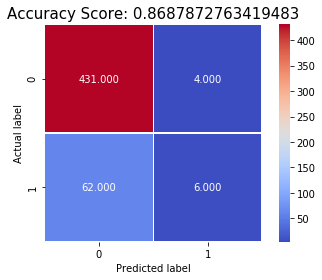

In [162]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.13519
Root Mean Square Error: 0.36768
Test Score: 0.86481
Train Score: 1.00000


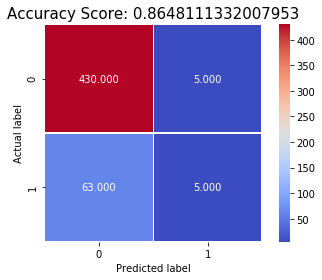

In [163]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.13121
Root Mean Square Error: 0.36223
Test Score: 0.86879
Train Score: 1.00000


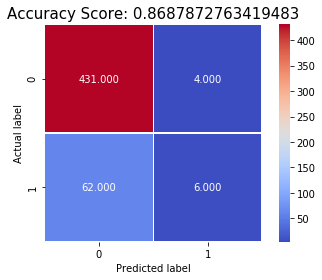

In [164]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.15308
Root Mean Square Error: 0.39126
Test Score: 0.84692
Train Score: 0.83930


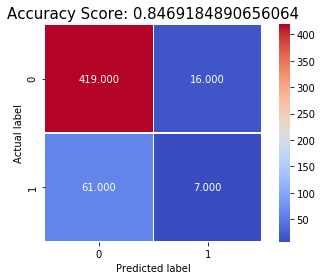

In [165]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.13121
Root Mean Square Error: 0.36223
Test Score: 0.86879
Train Score: 0.85672


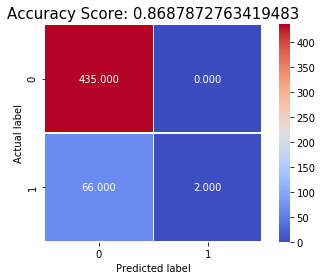

In [166]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.12326
Root Mean Square Error: 0.35108
Test Score: 0.87674
Train Score: 0.85423


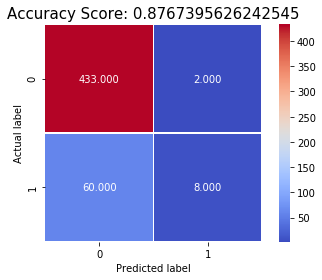

In [167]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [168]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score'}, inplace = True)
#fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score,5
0,Decision Tree depth 3,0.1332,0.36497,0.8668,0.86219,0
0,Decision Tree depth 5,0.14911,0.38614,0.85089,0.87363,0
0,Decision Tree depth 10,0.1829,0.42767,0.8171,0.9209,0
0,Random Forest estimator 50,0.1332,0.36497,0.8668,0.9995,0
0,Random Forest estimator 100,0.13121,0.36223,0.86879,1,0
0,Random Forest estimator 250,0.13519,0.36768,0.86481,1,0
0,Random Forest estimator 500,0.13121,0.36223,0.86879,1,0
0,Stochastic Gradient Descent,0.15308,0.39126,0.84692,0.8393,0
0,Elastic Net Classifier,0.13121,0.36223,0.86879,0.85672,0
0,Logistic Regression,0.12326,0.35108,0.87674,0.85423,0


In [169]:
logit_importance = logit.coef_[0]

Feature: 0, Score: -0.13036
Feature: 1, Score: -0.22586
Feature: 2, Score: -0.15479
Feature: 3, Score: -0.50398
Feature: 4, Score: 0.08247
Feature: 5, Score: 0.14783
Feature: 6, Score: 0.02271
Feature: 7, Score: 0.01119
Feature: 8, Score: -0.01313


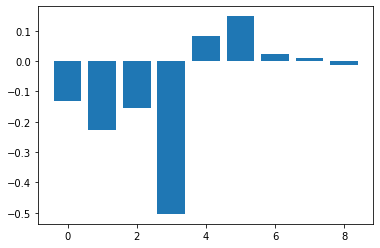

In [170]:
# summarize feature importance
for i,v in enumerate(logit_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(logit_importance))], logit_importance)
plt.show()

In [171]:
seasons = ['18-19']
validate_d1 = d[d.Season.isin(seasons)]

In [172]:
d1_WAR_model_data = np.array([validate_d1.WAR_delta_breakout,\
    validate_d1.Comp1,\
    validate_d1.Comp2,\
    validate_d1.Comp3,\
    validate_d1.Comp4,\
    validate_d1.lag_Comp1,\
    validate_d1.lag_Comp2,\
    validate_d1.lag_Comp3,\
    validate_d1.lag_Comp4,\
    validate_d1.team_change,\
    validate_d1.Age]).T

In [173]:
validate_d1["Prob"] = logit.predict_proba(d1_WAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
validate_d1 = validate_d1[['EH_ID', 'Season', 'Age','WAR','lead_WAR','WAR_delta','lag_WAR','Prob']]

[Text(0.5, 1.0, 'Comparison of Probability density')]

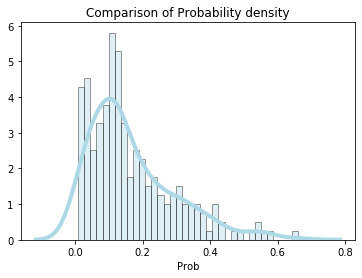

In [175]:
sns.distplot(validate_d1["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of Probability density')

In [176]:
validate_d1[validate_d1["Prob"] > 0.3]

,EH_ID,Season,Age,WAR,lead_WAR,WAR_delta,lag_WAR,Prob
5240,ADAM.LARSSON,18-19,26.135524,-1.3,0.1,1.4,0.2,0.382412
5308,ALEX.PETROVIC,18-19,26.830938,-1.7,NaN,NaN,0.0,0.565007
5470,BEN.HUTTON,18-19,25.700205,-0.8,1.2,2.0,0.2,0.352336
5485,BRAD.HUNT,18-19,30.354552,-0.2,0.3,0.5,0.8,0.359952
5513,BRANDON.MONTOUR,18-19,24.725530,-1.2,-0.2,1.0,1.3,0.539812
5544,BRENDAN.SMITH,18-19,29.894593,-0.9,-1.3,-0.4,0.1,0.318792
5579,BRENT.SEABROOK,18-19,33.700205,-1.7,-0.4,1.3,-0.8,0.360257
5692,CAM.FOWLER,18-19,27.074606,-0.1,0.7,0.8,-0.5,0.337570
5925,DENNIS.CHOLOWSKI,18-19,20.876112,-0.5,-0.5,0.0,NaN,0.351083
5975,DERYK.ENGELLAND,18-19,36.747433,-1.7,0.4,2.1,0.8,0.430919


In [177]:
validate_d1[validate_d1["WAR_delta"] > 1]

,EH_ID,Season,Age,WAR,lead_WAR,WAR_delta,lag_WAR,Prob
5240,ADAM.LARSSON,18-19,26.135524,-1.3,0.1,1.4,0.2,0.382412
5320,ALEX.PIETRANGELO,18-19,28.952772,1.8,3.2,1.4,1.9,0.093812
5422,ANTHONY.BITETTO,18-19,28.465435,-1.0,0.5,1.5,-0.4,0.226825
5470,BEN.HUTTON,18-19,25.700205,-0.8,1.2,2.0,0.2,0.352336
5579,BRENT.SEABROOK,18-19,33.700205,-1.7,-0.4,1.3,-0.8,0.360257
5975,DERYK.ENGELLAND,18-19,36.747433,-1.7,0.4,2.1,0.8,0.430919
6019,DOUGIE.HAMILTON,18-19,25.541410,0.8,2.3,1.5,1.7,0.209988
6229,IAN.COLE,18-19,29.859001,-1.1,1.6,2.7,1.0,0.294701
6238,ILYA.LYUBUSHKIN,18-19,24.739220,-0.1,1.0,1.1,NaN,0.136168
6242,IVAN.PROVOROV,18-19,21.965777,0.2,1.9,1.7,2.0,0.248943


In [178]:
d2_WAR_model_data = np.array([d.GAR_delta_breakout,\
    d.Comp1,\
    d.Comp2,\
    d.Comp3,\
    d.Comp4,\
    d.lag_Comp1,\
    d.lag_Comp2,\
    d.lag_Comp3,\
    d.lag_Comp4,\
    d.team_change,\
    d.Age]).T

In [179]:
d["WAR_delta_Prob"] = logit.predict_proba(d2_WAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
d_current_b = d[['EH_ID', 'Season', 'Age','WAR','lag_WAR','WAR_delta_Prob']]

In [181]:
d_current_b = d_current_b[d_current_b["Season"] == '19-20']

In [182]:
d_current_b[d_current_b["WAR_delta_Prob"] > 0.3].sort_values(by='WAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,WAR,lag_WAR,WAR_delta_Prob
7628,SHAYNE.GOSTISBEHERE,19-20,26.699521,-0.5,0.5,0.608975
7329,P.K..SUBBAN,19-20,30.636550,-1.8,-0.1,0.606606
5890,DANTE.FABBRO,19-20,21.533196,0.0,NaN,0.538094
6471,JOHN.KLINGBERG,19-20,27.381246,-0.1,1.8,0.483892
6285,JAKE.GARDINER,19-20,29.494867,-1.3,2.4,0.461497
6275,JACOB.TROUBA,19-20,25.845311,-1.5,1.5,0.456900
5545,BRENDAN.SMITH,19-20,30.893908,-1.3,-0.9,0.451225
6146,FILIP.HRONEK,19-20,22.162902,-0.1,0.4,0.428090
5504,BRANDON.CARLO,19-20,23.096509,0.1,1.6,0.412560
6213,HAMPUS.LINDHOLM,19-20,25.946612,0.2,1.3,0.407792


# FORWARDS GAR DELTA MODEL

In [183]:
f['lag_GAR'] = f['lag_GAR'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
f_WAR_model_data = np.array([f1.GAR_delta_breakout,\
    f1.Comp1,\
    f1.Comp2,\
    f1.Comp3,\
    f1.Comp4,\
    f1.Comp5,\
    f1.Comp6,\
    f1.Comp7,\
    f1.lag_Comp1,\
    f1.lag_Comp2,\
    f1.lag_Comp3,\
    f1.lag_Comp4,\
    f1.lag_Comp5,\
    f1.lag_Comp6,\
    f1.lag_Comp7,\
    f1.team_change,\
    f1.Age]).T

In [185]:
X = f_WAR_model_data[:,1:16] #changed to 1 until end, also changed from prelim_model to model
#X
y = f_WAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [186]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.15249
Root Mean Square Error: 0.39050
Test Score: 0.84751
Train Score: 0.84739


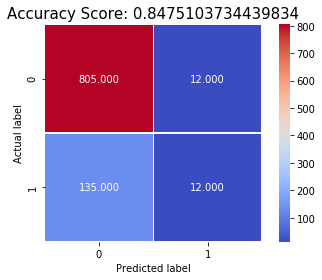

In [187]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.15560
Root Mean Square Error: 0.39446
Test Score: 0.84440
Train Score: 0.86089


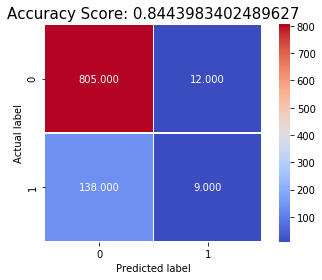

In [188]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.18983
Root Mean Square Error: 0.43570
Test Score: 0.81017
Train Score: 0.91539


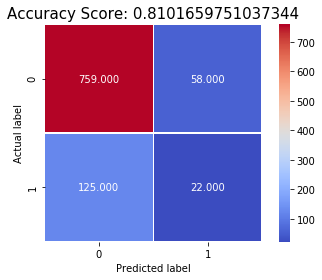

In [189]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.15041
Root Mean Square Error: 0.38783
Test Score: 0.84959
Train Score: 0.99922


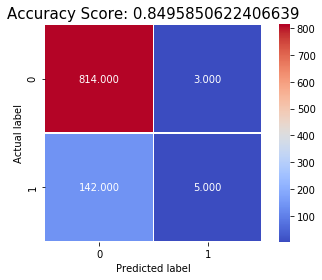

In [190]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.15041
Root Mean Square Error: 0.38783
Test Score: 0.84959
Train Score: 1.00000


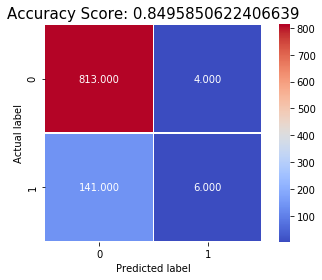

In [191]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.15353
Root Mean Square Error: 0.39183
Test Score: 0.84647
Train Score: 1.00000


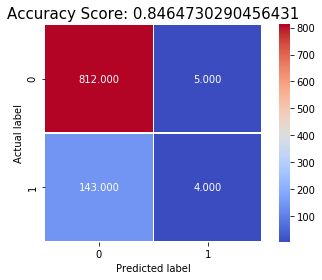

In [192]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.15041
Root Mean Square Error: 0.38783
Test Score: 0.84959
Train Score: 1.00000


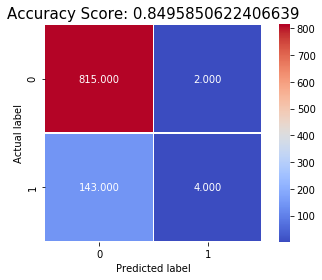

In [193]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.22718
Root Mean Square Error: 0.47663
Test Score: 0.77282
Train Score: 0.77524


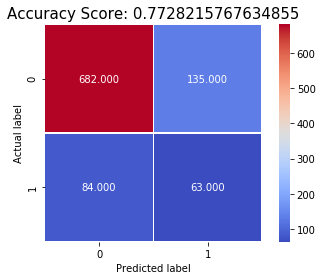

In [194]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.15249
Root Mean Square Error: 0.39050
Test Score: 0.84751
Train Score: 0.84557


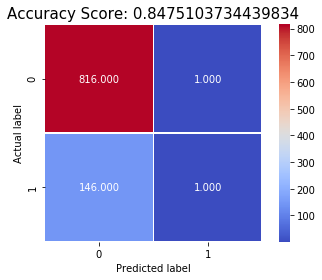

In [195]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.15249
Root Mean Square Error: 0.39050
Test Score: 0.84751
Train Score: 0.84921


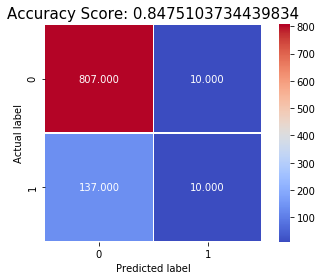

In [196]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [197]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score'}, inplace = True)
#fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score,5
0,Decision Tree depth 3,0.15249,0.3905,0.84751,0.84739,0
0,Decision Tree depth 5,0.1556,0.39446,0.8444,0.86089,0
0,Decision Tree depth 10,0.18983,0.4357,0.81017,0.91539,0
0,Random Forest estimator 50,0.15041,0.38783,0.84959,0.99922,0
0,Random Forest estimator 100,0.15041,0.38783,0.84959,1,0
0,Random Forest estimator 250,0.15353,0.39183,0.84647,1,0
0,Random Forest estimator 500,0.15041,0.38783,0.84959,1,0
0,Stochastic Gradient Descent,0.22718,0.47663,0.77282,0.77524,0
0,Elastic Net Classifier,0.15249,0.3905,0.84751,0.84557,0
0,Logistic Regression,0.15249,0.3905,0.84751,0.84921,0


In [198]:
sgd_en_importance = sgd_en.coef_[0]

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.12765
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.61340
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.08289
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04228
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.20387
Feature: 11, Score: 0.17372
Feature: 12, Score: 0.19231
Feature: 13, Score: -0.10985
Feature: 14, Score: 0.00000


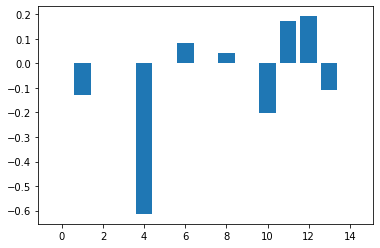

In [199]:
# summarize feature importance
for i,v in enumerate(sgd_en_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(sgd_en_importance))], sgd_en_importance)
plt.show()

In [200]:
seasons = ['18-19']
validate_f2 = f[f.Season.isin(seasons)]

In [201]:
f1_GAR_model_data = np.array([validate_f2.GAR_delta_breakout,\
    validate_f2.Comp1,\
    validate_f2.Comp2,\
    validate_f2.Comp3,\
    validate_f2.Comp4,\
    validate_f2.Comp5,\
    validate_f2.Comp6,\
    validate_f2.Comp7,\
    validate_f2.lag_Comp1,\
    validate_f2.lag_Comp2,\
    validate_f2.lag_Comp3,\
    validate_f2.lag_Comp4,\
    validate_f2.lag_Comp5,\
    validate_f2.lag_Comp6,\
    validate_f2.lag_Comp7,\
    validate_f2.team_change,\
    validate_f2.Age]).T

In [202]:
validate_f2["Prob"] = sgd_en.predict_proba(f1_GAR_model_data[:,1:16])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [203]:
validate_f2 = validate_f2[['EH_ID', 'Season', 'Age','GAR','lead_GAR','GAR_delta','lag_GAR','GAR_delta_breakout','Prob']]

[Text(0.5, 1.0, 'Comparison of GAR Delta Probability density')]

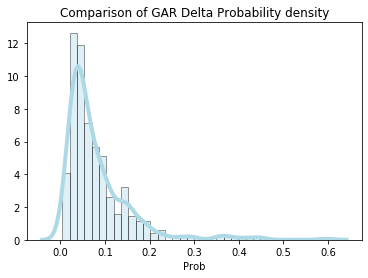

In [204]:
sns.distplot(validate_f2["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of GAR Delta Probability density')

Likely >0.3 as cutoff value

In [217]:
validate_f2[validate_f2["Prob"] > 0.25].sort_values(by='Prob', ascending=False)

,EH_ID,Season,Age,GAR,lead_GAR,GAR_delta,lag_GAR,GAR_delta_breakout,Prob
4228,RYAN.GETZLAF,18-19,33.645448,-3.8,-2.1,1.7,12.4,0,0.596039
1938,JAKE.VIRTANEN,18-19,22.373717,-5.2,1.9,7.1,2.8,1,0.449569
1474,DERICK.BRASSARD,18-19,31.277207,-14.6,4.1,18.7,6.9,1,0.445797
2614,KEVIN.FIALA,18-19,22.444901,-7.4,9.5,16.9,10.4,1,0.422775
2480,JORDAN.EBERLE,18-19,28.632444,-0.2,5.4,5.6,13.0,1,0.406899
1005,CLAUDE.GIROUX,18-19,30.970568,18.3,8.9,-9.4,26.9,0,0.383167
4263,RYAN.KESLER,18-19,34.335387,-14.0,NaN,NaN,-5.6,0,0.371703
646,BRENDAN.GALLAGHER,18-19,26.655715,8.5,12.0,3.5,11.7,0,0.368670
177,ALEX.WENNBERG,18-19,24.276523,-1.7,1.7,3.4,19.2,0,0.356483
4628,TAGE.THOMPSON,18-19,21.171800,-10.2,NaN,NaN,-4.7,0,0.351637


In [206]:
validate_f2[validate_f2["GAR_delta"] > 5].sort_values(by='Prob', ascending=False)

,EH_ID,Season,Age,GAR,lead_GAR,GAR_delta,lag_GAR,GAR_delta_breakout,Prob
1938,JAKE.VIRTANEN,18-19,22.373717,-5.2,1.9,7.1,2.8,1,0.449569
1474,DERICK.BRASSARD,18-19,31.277207,-14.6,4.1,18.7,6.9,1,0.445797
2614,KEVIN.FIALA,18-19,22.444901,-7.4,9.5,16.9,10.4,1,0.422775
2480,JORDAN.EBERLE,18-19,28.632444,-0.2,5.4,5.6,13.0,1,0.406899
3566,NAZEM.KADRI,18-19,28.238193,1.7,12.1,10.4,4.6,1,0.280833
3229,MAX.PACIORETTY,18-19,30.113621,-4.6,16.9,21.5,3.7,1,0.260550
1925,JADEN.SCHWARTZ,18-19,26.518823,2.0,12.1,10.1,16.6,1,0.227517
220,ANDREI.SVECHNIKOV,18-19,18.767967,-2.2,14.2,16.4,0.0,1,0.220210
104,ALEX.IAFALLO,18-19,25.029432,1.3,8.1,6.8,6.5,1,0.180599
1959,JAKUB.VORACEK,18-19,29.379877,4.3,10.2,5.9,6.6,1,0.164664


In [207]:
f2_GAR_model_data = np.array([f.GAR_delta_breakout,\
    f.Comp1,\
    f.Comp2,\
    f.Comp3,\
    f.Comp4,\
    f.Comp5,\
    f.Comp6,\
    f.Comp7,\
    f.lag_Comp1,\
    f.lag_Comp2,\
    f.lag_Comp3,\
    f.lag_Comp4,\
    f.lag_Comp5,\
    f.lag_Comp6,\
    f.lag_Comp7,\
    f.team_change,\
    f.Age]).T

In [208]:
f["GAR_delta_Prob"] = sgd_en.predict_proba(f2_GAR_model_data[:,1:16])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
seasons = ['19-20']

In [210]:
f_current = f[f.Season.isin(seasons)]

In [211]:
f_current = f[['EH_ID', 'Season', 'Age','GAR','lag_GAR','GAR_delta_Prob']]

In [212]:
f_current = f_current[f_current["Season"] == '19-20']

In [216]:
f_current[f_current["GAR_delta_Prob"] > 0.25].sort_values(by='GAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,GAR,lag_GAR,GAR_delta_Prob
2625,KEVIN.LABANC,19-20,24.054757,-2.5,2.3,0.404717
2597,KAAPO.KAKKO,19-20,18.880219,-9.6,0.0,0.353132
4727,TIMO.MEIER,19-20,23.230664,3.2,14.0,0.304758
566,BRADY.TKACHUK,19-20,20.292950,5.1,7.3,0.300393
2334,JOE.THORNTON,19-20,40.501027,1.0,13.4,0.285115
53,ALEKSANDER.BARKOV,19-20,24.331280,2.3,23.9,0.284292
45,ADRIAN.KEMPE,19-20,23.299110,-1.0,0.6,0.283393
2426,JOHNNY.GAUDREAU,19-20,26.384668,3.0,17.3,0.269508
2698,KYLE.CONNOR,19-20,23.060917,0.0,10.6,0.264105


# DEFENSEMEN GAR DELTA

In [218]:
seasons = ['07-08','08-09', '09-10', '10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19']
d3 = d[d.Season.isin(seasons)]

In [219]:
d_GAR_model_data = np.array([d3.GAR_delta_breakout,\
    d3.Comp1,\
    d3.Comp2,\
    d3.Comp3,\
    d3.Comp4,\
    d3.lag_Comp1,\
    d3.lag_Comp2,\
    d3.lag_Comp3,\
    d3.lag_Comp4,\
    d3.team_change,\
    d3.Age]).T

In [220]:
X = d_GAR_model_data[:,1:10] #changed to 1 until end, also changed from prelim_model to model
#X
y = d_GAR_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [221]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    #logit_predictions = logit.predict(X_test) 
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(testScore)
    plt.title(title, size = 15)
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)

Decision Tree depth 3:
Mean Square Error: 0.16302
Root Mean Square Error: 0.40376
Test Score: 0.83698
Train Score: 0.83930


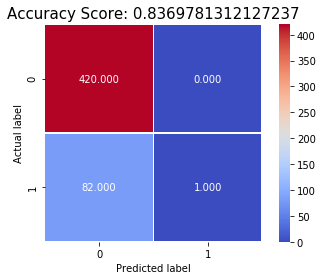

In [222]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.18091
Root Mean Square Error: 0.42534
Test Score: 0.81909
Train Score: 0.85522


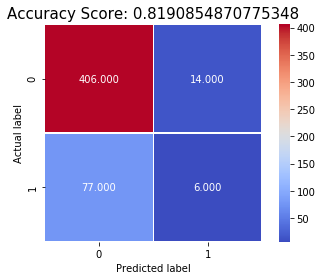

In [223]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.19483
Root Mean Square Error: 0.44140
Test Score: 0.80517
Train Score: 0.92289


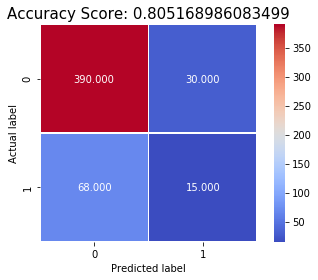

In [224]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.16103
Root Mean Square Error: 0.40129
Test Score: 0.83897
Train Score: 0.99950


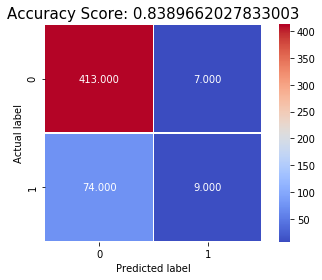

In [225]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.16899
Root Mean Square Error: 0.41108
Test Score: 0.83101
Train Score: 1.00000


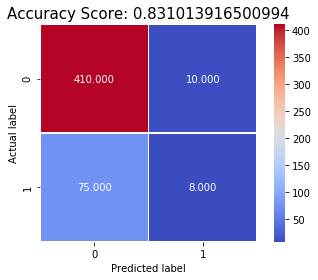

In [226]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.16103
Root Mean Square Error: 0.40129
Test Score: 0.83897
Train Score: 1.00000


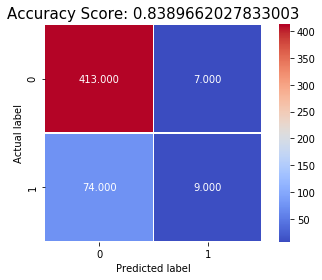

In [227]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 500:
Mean Square Error: 0.16302
Root Mean Square Error: 0.40376
Test Score: 0.83698
Train Score: 1.00000


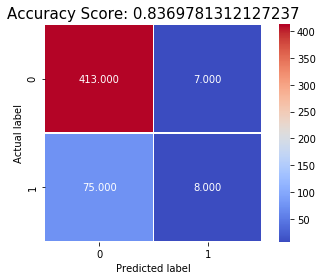

In [228]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Stochastic Gradient Descent:
Mean Square Error: 0.17495
Root Mean Square Error: 0.41827
Test Score: 0.82505
Train Score: 0.82836


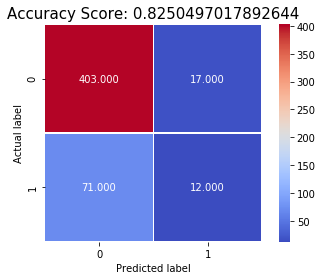

In [229]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Elastic Net:
Mean Square Error: 0.23062
Root Mean Square Error: 0.48023
Test Score: 0.76938
Train Score: 0.77363


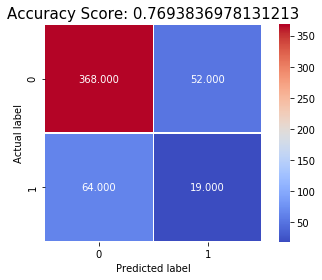

In [230]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Logistic Regression:
Mean Square Error: 0.15308
Root Mean Square Error: 0.39126
Test Score: 0.84692
Train Score: 0.83333


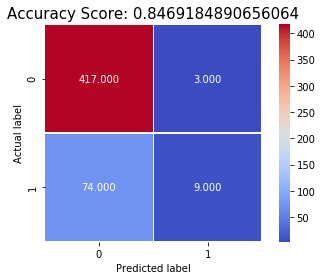

In [231]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [232]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score'}, inplace = True)
#fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

,Model,MSE,RMSE,Test Score,Train Score,5
0,Decision Tree depth 3,0.16302,0.40376,0.83698,0.8393,0
0,Decision Tree depth 5,0.18091,0.42534,0.81909,0.85522,0
0,Decision Tree depth 10,0.19483,0.4414,0.80517,0.92289,0
0,Random Forest estimator 50,0.16103,0.40129,0.83897,0.9995,0
0,Random Forest estimator 100,0.16899,0.41108,0.83101,1,0
0,Random Forest estimator 250,0.16103,0.40129,0.83897,1,0
0,Random Forest estimator 500,0.16302,0.40376,0.83698,1,0
0,Stochastic Gradient Descent,0.17495,0.41827,0.82505,0.82836,0
0,Elastic Net Classifier,0.23062,0.48023,0.76938,0.77363,0
0,Logistic Regression,0.15308,0.39126,0.84692,0.83333,0


In [233]:
logit_importance = logit.coef_[0]

Feature: 0, Score: -0.14372
Feature: 1, Score: -0.23104
Feature: 2, Score: -0.12415
Feature: 3, Score: -0.49351
Feature: 4, Score: 0.08489
Feature: 5, Score: 0.15386
Feature: 6, Score: 0.00101
Feature: 7, Score: -0.00155
Feature: 8, Score: -0.08654


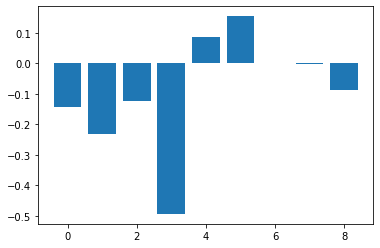

In [234]:
# summarize feature importance
for i,v in enumerate(logit_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(logit_importance))], logit_importance)
plt.show()

In [235]:
seasons = ['18-19']
validate_d2 = d[d.Season.isin(seasons)]

In [236]:
d2_GAR_model_data = np.array([validate_d2.GAR_delta_breakout,\
    validate_d2.Comp1,\
    validate_d2.Comp2,\
    validate_d2.Comp3,\
    validate_d2.Comp4,\
    validate_d2.lag_Comp1,\
    validate_d2.lag_Comp2,\
    validate_d2.lag_Comp3,\
    validate_d2.lag_Comp4,\
    validate_d2.team_change,\
    validate_d2.Age]).T

In [237]:
validate_d2["Prob"] = logit.predict_proba(d2_GAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
validate_d2 = validate_d2[['EH_ID', 'Season', 'Age','GAR','lead_GAR','GAR_delta','lag_GAR','GAR_delta_breakout','Prob']]

[Text(0.5, 1.0, 'Comparison of GAR Delta Probability density')]

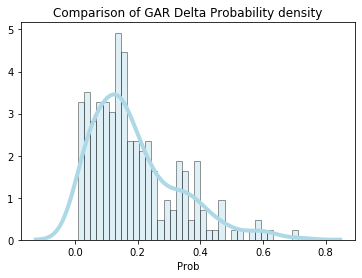

In [239]:
sns.distplot(validate_d2["Prob"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title = 'Comparison of GAR Delta Probability density')

In [240]:
validate_d2[validate_d2["Prob"] > 0.4].sort_values(by='Prob', ascending=False)

,EH_ID,Season,Age,GAR,lead_GAR,GAR_delta,lag_GAR,GAR_delta_breakout,Prob
7301,OLIVER.EKMAN-LARSSON,18-19,27.460643,-2.4,3.6,6.0,11.0,1,0.711621
5308,ALEX.PETROVIC,18-19,26.830938,-9.0,NaN,NaN,0.1,0,0.616531
7328,P.K..SUBBAN,18-19,29.637235,-0.6,-10.1,-9.5,11.4,0,0.612673
5513,BRANDON.MONTOUR,18-19,24.725530,-6.6,-1.0,5.6,6.5,1,0.594124
6540,JONATHAN.ERICSSON,18-19,34.833676,-9.4,NaN,NaN,-5.5,0,0.589207
6038,DREW.DOUGHTY,18-19,29.065024,-2.1,0.3,2.4,12.9,0,0.573416
6199,GUSTAV.FORSLING,18-19,22.554415,-9.6,NaN,NaN,1.7,0,0.527418
7453,ROMAN.JOSI,18-19,28.585900,2.1,17.9,15.8,8.5,1,0.503257
5975,DERYK.ENGELLAND,18-19,36.747433,-8.9,2.3,11.2,4.0,1,0.476899
7643,SHEA.WEBER,18-19,33.382615,1.5,4.1,2.6,6.6,0,0.476289


In [241]:
validate_d2[validate_d2["GAR_delta"] > 5].sort_values(by='Prob', ascending=False)

,EH_ID,Season,Age,GAR,lead_GAR,GAR_delta,lag_GAR,GAR_delta_breakout,Prob
7301,OLIVER.EKMAN-LARSSON,18-19,27.460643,-2.4,3.6,6.0,11.0,1,0.711621
5513,BRANDON.MONTOUR,18-19,24.725530,-6.6,-1.0,5.6,6.5,1,0.594124
7453,ROMAN.JOSI,18-19,28.585900,2.1,17.9,15.8,8.5,1,0.503257
5975,DERYK.ENGELLAND,18-19,36.747433,-8.9,2.3,11.2,4.0,1,0.476899
6397,JAY.BOUWMEESTER,18-19,35.263518,-11.4,-4.5,6.9,1.0,1,0.466983
6873,MARCO.SCANDELLA,18-19,28.854209,-4.9,9.3,14.2,-3.1,1,0.451655
5240,ADAM.LARSSON,18-19,26.135524,-6.8,0.6,7.4,1.1,1,0.416651
6598,JUSTIN.BRAUN,18-19,31.890486,-10.0,5.4,15.4,3.5,1,0.411734
5470,BEN.HUTTON,18-19,25.700205,-4.3,6.7,11.0,1.2,1,0.397909
5579,BRENT.SEABROOK,18-19,33.700205,-9.3,-2.2,7.1,-4.1,1,0.394447


In [242]:
d2_GAR_model_data = np.array([d.GAR_delta_breakout,\
    d.Comp1,\
    d.Comp2,\
    d.Comp3,\
    d.Comp4,\
    d.lag_Comp1,\
    d.lag_Comp2,\
    d.lag_Comp3,\
    d.lag_Comp4,\
    d.team_change,\
    d.Age]).T

In [243]:
d["GAR_delta_Prob"] = logit.predict_proba(d2_GAR_model_data[:,1:10])[:,1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
seasons = ['19-20']

In [245]:
d_current = d[d.Season.isin(seasons)]

In [246]:
d_current = d[['EH_ID', 'Season', 'Age','GAR','lag_GAR','GAR_delta_Prob']]

In [247]:
d_current = d_current[d_current["Season"] == '19-20']

In [248]:
d_current[d_current["GAR_delta_Prob"] > 0.5].sort_values(by='GAR_delta_Prob', ascending=False)

,EH_ID,Season,Age,GAR,lag_GAR,GAR_delta_Prob
7628,SHAYNE.GOSTISBEHERE,19-20,26.699521,-3.0,2.9,0.655691
7329,P.K..SUBBAN,19-20,30.636550,-10.1,-0.6,0.652506
5890,DANTE.FABBRO,19-20,21.533196,-0.3,NaN,0.570769
6471,JOHN.KLINGBERG,19-20,27.381246,-0.6,9.7,0.535630
5545,BRENDAN.SMITH,19-20,30.893908,-7.4,-5.0,0.501268


In [250]:
d.columns

Index(['Unnamed: 0', 'X', 'EH_ID', 'Season', 'Age', 'pos_group', 'Team', 'GP',
       'Take_GAR', 'Draw_GAR', 'SPAR', 'xSPAR', 'ev_zone_pct', 'EVO_GAR',
       'EV_RF', 'EV_QF', 'rapm_ev_gf60', 'rapm_ev_cf60', 'rapm_ev_xgf60',
       'EVD_GAR', 'EV_RA', 'EV_QA', 'rapm_ev_ca60', 'rapm_ev_xga60',
       'pp_zone_pct', 'PPO_GAR', 'PPO_RF', 'PPO_QF', 'rapm_pp_gf60',
       'rapm_pp_cf60', 'rapm_pp_xgf60', 'g_60', 'a1_60', 'a2_60', 'p_60',
       'isf_60', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7',
       'cluster', 'lead_EVO_GAR', 'lead_EVD_GAR', 'lead_PPO_GAR', 'lead_GP',
       'lead_rapm_ev_xgf60', 'lead_g_60', 'lead_p_60', 'lead_SHD_GAR',
       'team_change', 'Off_GAR', 'Def_GAR', 'GAR', 'WAR', 'lead_Off_GAR',
       'lead_Def_GAR', 'lead_GAR', 'lead_WAR', 'lag_Off_GAR', 'lag_Def_GAR',
       'lag_GAR', 'lag_WAR', 'lead_SPAR', 'lag_SPAR', 'EVO_GAR_delta',
       'WAR_delta', 'GAR_delta', 'Def_GAR_delta', 'Off_GAR_delta',
       'EVD_GAR_delta', 'SPAR_delta', 'lag_C

In [251]:
d.shape

(2722, 87)

In [252]:
f.columns

Index(['Unnamed: 0', 'X', 'EH_ID', 'Season', 'Age', 'pos_group', 'Team', 'GP',
       'Take_GAR', 'Draw_GAR', 'SPAR', 'xSPAR', 'ev_zone_pct', 'EVO_GAR',
       'EV_RF', 'EV_QF', 'rapm_ev_gf60', 'rapm_ev_cf60', 'rapm_ev_xgf60',
       'EVD_GAR', 'EV_RA', 'EV_QA', 'rapm_ev_ca60', 'rapm_ev_xga60',
       'pp_zone_pct', 'PPO_GAR', 'PPO_RF', 'PPO_QF', 'rapm_pp_gf60',
       'rapm_pp_cf60', 'rapm_pp_xgf60', 'g_60', 'a1_60', 'a2_60', 'p_60',
       'isf_60', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7',
       'cluster', 'lead_EVO_GAR', 'lead_EVD_GAR', 'lead_PPO_GAR', 'lead_GP',
       'lead_rapm_ev_xgf60', 'lead_g_60', 'lead_p_60', 'lead_SHD_GAR',
       'team_change', 'Off_GAR', 'Def_GAR', 'GAR', 'WAR', 'lead_Off_GAR',
       'lead_Def_GAR', 'lead_GAR', 'lead_WAR', 'lag_Off_GAR', 'lag_Def_GAR',
       'lag_GAR', 'lag_WAR', 'lead_SPAR', 'lag_SPAR', 'EVO_GAR_delta',
       'WAR_delta', 'GAR_delta', 'Def_GAR_delta', 'Off_GAR_delta',
       'EVD_GAR_delta', 'SPAR_delta', 'lag_C

In [253]:
f.shape

(5211, 87)

In [254]:
class_df = f

In [255]:
class_df = class_df.append(d)

In [257]:
class_df.shape

(7933, 87)

In [259]:
class_df.to_csv('class_df.csv')